<a href="https://www.kaggle.com/code/divyanshukunwar/cyber-crimes?scriptVersionId=116180920" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-gis-data/India States/Indian_states.shp
/kaggle/input/india-gis-data/India States/Indian_states.prj
/kaggle/input/india-gis-data/India States/Indian_states.dbf
/kaggle/input/india-gis-data/India States/Indian_states.shx
/kaggle/input/india-gis-data/India Boundary/India_boundary.dbf
/kaggle/input/india-gis-data/India Boundary/India_boundary.prj
/kaggle/input/india-gis-data/India Boundary/India_boundary.shx
/kaggle/input/india-gis-data/India Boundary/India_boundary.shp
/kaggle/input/geojson-for-indian-states/states_india.geojson
/kaggle/input/cyber-crime-in-india-stateut-wise/2014-2017.csv
/kaggle/input/cyber-crime-in-india-stateut-wise/_CleanedData2002-2020.csv
/kaggle/input/cyber-crime-in-india-stateut-wise/2002-2013.csv
/kaggle/input/cyber-crime-in-india-stateut-wise/2018-2020.csv


## Data Prprocessing \[For Practise Only\]

Since we have three files with little variation in the data we need to clean the data however a clean dataset is already provided in 
> /kaggle/input/cyber-crime-in-india-stateut-wise/_CleanedData2002-2020.csv

1. Calculate the total value and rename the columns of year 2002-2004 .
2. Rename the value of states as well wherever required
3. Reset the index 
4. Repeat the process for other states as well 
5. Join the dataFrame in one

In [2]:
df = pd.read_csv("/kaggle/input/cyber-crime-in-india-stateut-wise/2002-2013.csv")

# sum of first two columns in a new column will give total cases in the year
for i in range(2002 , 2014):
    df[str(i)] = df[str(i)+" IT Act"] + df[str(i)+" IPC Section"]
    df.drop(columns=[str(i)+" IT Act", str(i)+" IPC Section"] , inplace=True)

# Replace withh the new name of the state to match consistency
df['State/UT'] = df['State/UT'].replace(['ORISSA', 'UTTARANCHAL', 'PONDICHERRY'] , ['ODISHA' ,'UTTARAKHAND', 'PUDUCHERRY'])
df.set_index("State/UT" , inplace=True)


otherdf = pd.read_csv("/kaggle/input/cyber-crime-in-india-stateut-wise/2014-2017.csv")
otherdf.rename(columns={"2014 Total":"2014" , "2015 Total": "2015" , "2016 Total":"2016" , "2017 Total":"2017"} , inplace=True)
otherdf['State/UT'] = otherdf['State/UT'].apply(lambda a : str.upper(a))
otherdf['State/UT']=otherdf['State/UT'].replace(['DELHI UT','D&N HAVELI'] , ['DELHI' , 'D & N HAVELI'])
otherdf = otherdf.set_index("State/UT")
df = otherdf.join(df)
thirddf = pd.read_csv("/kaggle/input/cyber-crime-in-india-stateut-wise/2018-2020.csv")
thirddf['State/UT'] = thirddf['State/UT'].apply(lambda a : str.upper(a))
thirddf['State/UT'] = thirddf['State/UT'].replace(['A&N ISLANDS' , 'D&N HAVELI AND'] , ['A & N ISLANDS' , 'D & N HAVELI'])
thirddf = thirddf.set_index("State/UT")
df = thirddf.join(df)
df.to_csv("CompleteData.csv")
df = df.fillna(0)

df.head(35)

,2018,2019,2020,2014,2015,2016,2017,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
State/UT,,,,,,,,,,,,,,,,,,,
ANDHRA PRADESH,1207,1886,1899,282.0,536.0,616.0,931.0,261.0,221.0,101.0,82.0,82.0,69.0,103.0,38.0,171.0,372.0,651.0,651.0
ARUNACHAL PRADESH,7,8,30,18.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,14.0,10.0,10.0
ASSAM,2022,2231,3530,379.0,483.0,696.0,1120.0,2.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,18.0,31.0,154.0,154.0
BIHAR,374,1050,1512,114.0,242.0,309.0,433.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,139.0,139.0
CHHATTISGARH,139,175,297,123.0,103.0,90.0,171.0,0.0,0.0,0.0,46.0,28.0,57.0,20.0,50.0,50.0,78.0,101.0,101.0
GOA,29,15,40,62.0,17.0,31.0,13.0,8.0,2.0,0.0,0.0,0.0,4.0,6.0,12.0,16.0,18.0,58.0,58.0
GUJARAT,702,784,1283,227.0,242.0,362.0,458.0,250.0,29.0,126.0,155.0,158.0,3.0,33.0,36.0,55.0,67.0,77.0,77.0
HARYANA,418,564,656,151.0,224.0,401.0,504.0,2.0,1.0,0.0,9.0,2.0,1.0,0.0,0.0,1.0,45.0,323.0,323.0
HIMACHAL PRADESH,69,76,98,38.0,50.0,31.0,56.0,99.0,87.0,0.0,0.0,0.0,0.0,6.0,6.0,17.0,12.0,28.0,28.0


In [3]:
# we can also read from /kaggle/input/cyber-crime-in-india-stateut-wise/_CleanedData2002-2020.csv
# df = pd.read_csv("/kaggle/input/cyber-crime-in-india-stateut-wise/_CleanedData2002-2020.csv")

## GeoPandas
GeoPandas, as the name suggests, extends the popular data science library pandas by adding support for geospatial data.

The core data structure in GeoPandas is the `geopandas.GeoDataFrame` , a subclass of pandas.DataFrame, that can store geometry columns and perform spatial operations. The `geopandas.GeoSeries`, a subclass of `pandas.Series`, handles the geometries. Therefore, your GeoDataFrame is a combination of pandas.Series, with traditional data (numerical, boolean, text etc.), and `geopandas.GeoSeries`, with geometries (points, polygons etc.).

In [4]:
import geopandas as gpd

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [5]:
gdf = gpd.read_file('/kaggle/input/geojson-for-indian-states/states_india.geojson')
gdf['st_nm'] = gdf['st_nm'].apply(lambda a : str.upper(a))
gdf.head()

,cartodb_id,state_code,st_nm,geometry
0,1,0,TELENGANA,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19..."
1,2,35,ANDAMAN AND NICOBAR,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,3,28,ANDHRA PRADESH,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16..."
3,4,12,ARUNACHAL PRADESH,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29..."
4,5,18,ASSAM,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."


In [6]:
df = df.reset_index()
df['State/UT'] = df['State/UT'].replace(['TELANGANA','A & N ISLANDS','JAMMU & KASHMIR','D & N HAVELI']
,['TELENGANA','ANDAMAN AND NICOBAR','JAMMU AND KASHMIR' , 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU'])
df.set_index("State/UT" , inplace=True)

df[df.index=='JAMMU AND KASHMIR'] = df[df.index=='JAMMU AND KASHMIR'].values+ df[df.index=='LADAKH '].values

In [7]:
gdf = gdf.set_index('st_nm').join(df)

In [8]:
for i in df.index:
    if(not(i in gdf.index)):
        print(i)
        

LADAKH 


<AxesSubplot:>

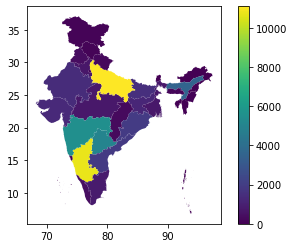

In [9]:
gdf.plot("2020", legend=True)